<h1 style="text-align:center;">Лабораторная работа №1</h1>

<h3 style="text-align:center;">Осипов Алексей Б01-204</h3>

**Цель**: получить траекторию движения спутника вокруг планеты, проведя численное решение задачи двух тел, а тажке исследовать зависимость численного решения от шана интегрирования


Система ОДУ:

$$
x' = z
$$
$$
y' = u
$$
$$
z' = -\frac{x}{(x^2 + y^2)^{3/2}}
$$
$$
u' = -\frac{y}{(x^2 + y^2)^{3/2}}
$$

Начальные условия:

$$
x(0) = 0.5, \quad y(0) = z(0) = 0, \quad u(0) = \sqrt{3} \approx 1.73
$$

при $0 \le t \le 20$ следующими методами методами:
1. Явные методы Рунге-Кутты от 1 до 4 порядка
2. Явные методы Адамса от 2 до 4 порядка
3. Явные методы Формулы Дифференцирования Назад от 1 до 3 порядка

In [251]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

<h3 style="text-align:center;">Явные методы Рунге - Кутты</h3>

**Определение.** *S-стадийный одношаговый явный метод для численного решения задачи Коши для обыкновенного дифференциального уравнения (1.1)*:

<div align="left">

$$
\begin{aligned}
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + c_2 \tau,\, y_n + \tau a_{21} k_1), \\
k_3 &= f(t_n + c_3 \tau,\, y_n + \tau (a_{31} k_1 + a_{32} k_2)), \ldots, \\
k_s &= f(t_n + c_s \tau,\, y_n + \tau (a_{s1} k_1 + \ldots + a_{s\,s-1} k_{s-1})), \\
y_{n+1} &= y_n + \tau (b_1 k_1 + \ldots + b_s k_s)
\end{aligned}
$$

</div>

*где $k_i$ — промежуточные вспомогательные величины.*


Для конкретных методов будем использовать таблицы Бутчера 

Пример: *таблица Бутчера для метода Рунге - Кутты 4-го порядка*
$$
\begin{array}{c|cccc}
0   & 0   & 0   & 0   & 0   \\
\frac{1}{2} & \frac{1}{2} & 0   & 0   & 0   \\
\frac{1}{2} & 0   & \frac{1}{2} & 0   & 0   \\
1   & 0   & 0   & 1   & 0   \\
\hline
    & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# Правая часть системы ОДУ
def f(t, Y):
    x, y, z, u = Y
    r3 = (x**2 + y**2)**1.5
    return np.array([z, u, -x / r3, -y / r3])

# Метод Рунге-Кутты 1-го порядка
def rk1_step(t, Y, h):
    return Y + h * f(t, Y)

# Метод Рунге-Кутты 2-го порядка
def rk2_step(t, Y, h):
    k1 = f(t, Y)
    k2 = f(t + h, Y + h * k1)
    return Y + h / 2 * (k1 + k2)

# Метод Рунге-Кутты 3-го порядка
def rk3_step(t, Y, h):
    k1 = f(t, Y)
    k2 = f(t + h / 2, Y + h / 2 * k1)
    k3 = f(t + h, Y - h * k1 + 2 * h * k2)
    return Y + h / 6 * (k1 + 4 * k2 + k3)

# Метод Рунге-Кутты 4-го порядка
def rk4_step(t, Y, h):
    k1 = f(t, Y)
    k2 = f(t + h/2, Y + h/2 * k1)
    k3 = f(t + h/2, Y + h/2 * k2)
    k4 = f(t + h, Y + h * k3)
    return Y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

# Универсальный решатель
def solve_runge_kutta(method, Y0, h, t_end):
    t = 0
    ts = [t]
    Ys = [Y0]
    Y = Y0.copy()
    while t < t_end:
        Y = method(t, Y, h)
        t += h
        ts.append(t)
        Ys.append(Y.copy())
    return np.array(ts), np.array(Ys)



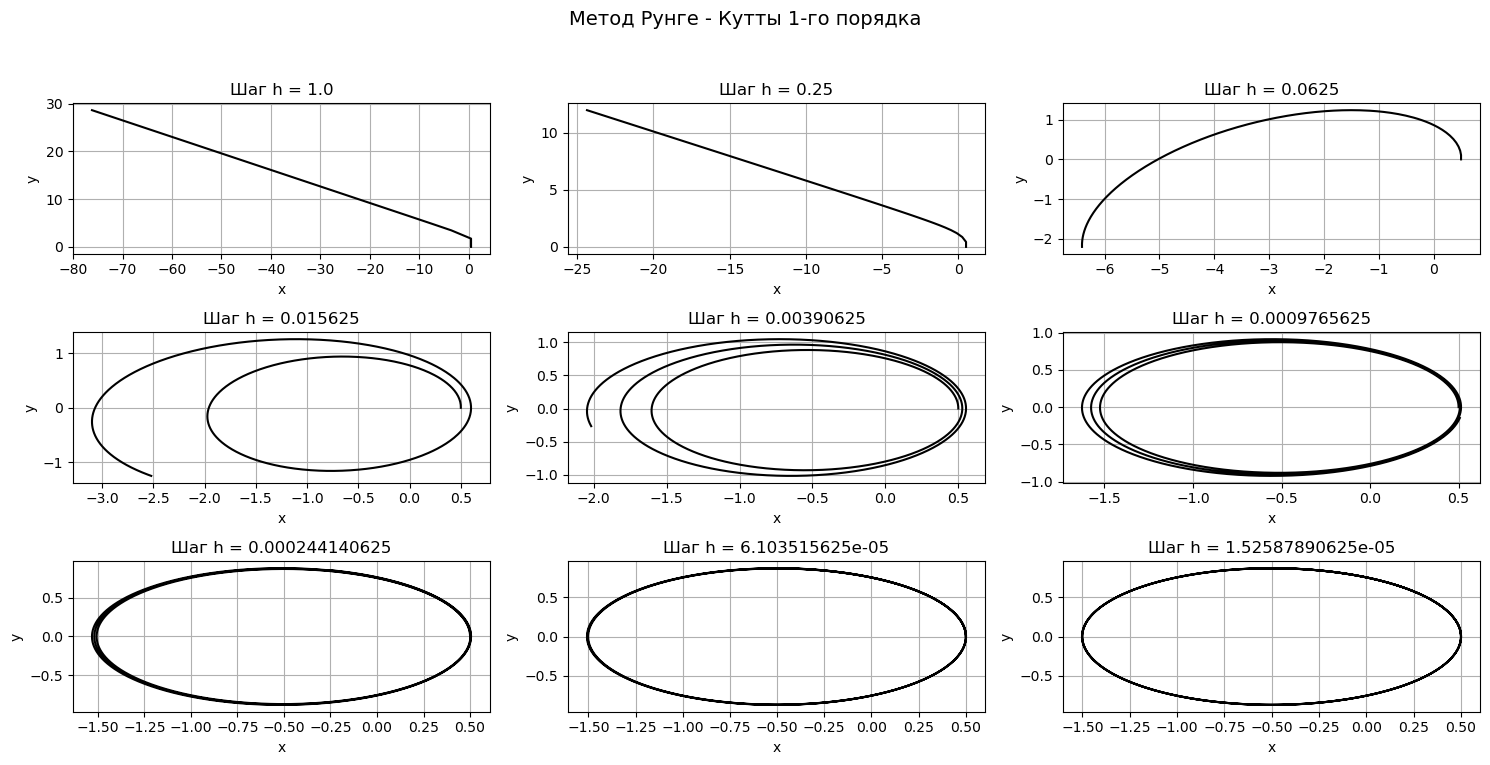

In [264]:
# Параметры
Y0 = np.array([0.5, 0, 0, np.sqrt(3)])
t_end = 20
steps = [1/4**i for i in range(9)]

# Построение графиков
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle("Метод Рунге - Кутты 1-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_runge_kutta(rk1_step, Y0, h, t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='black')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # чтобы не перекрыть заголовок
plt.show()

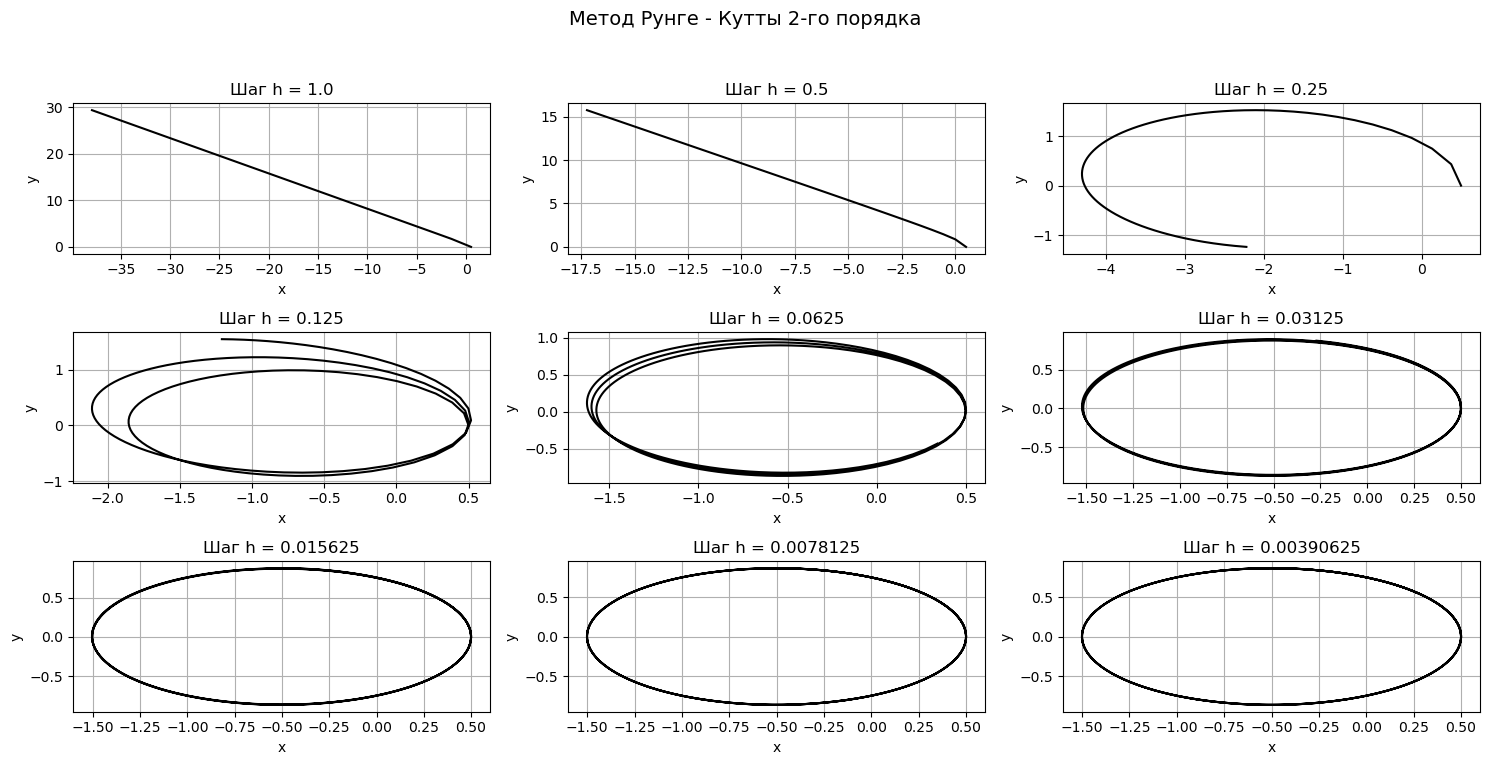

In [266]:
steps = [1/2**i for i in range(9)]
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle("Метод Рунге - Кутты 2-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_runge_kutta(rk2_step, Y0, h, t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='black')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # чтобы не перекрыть заголовок
plt.show()

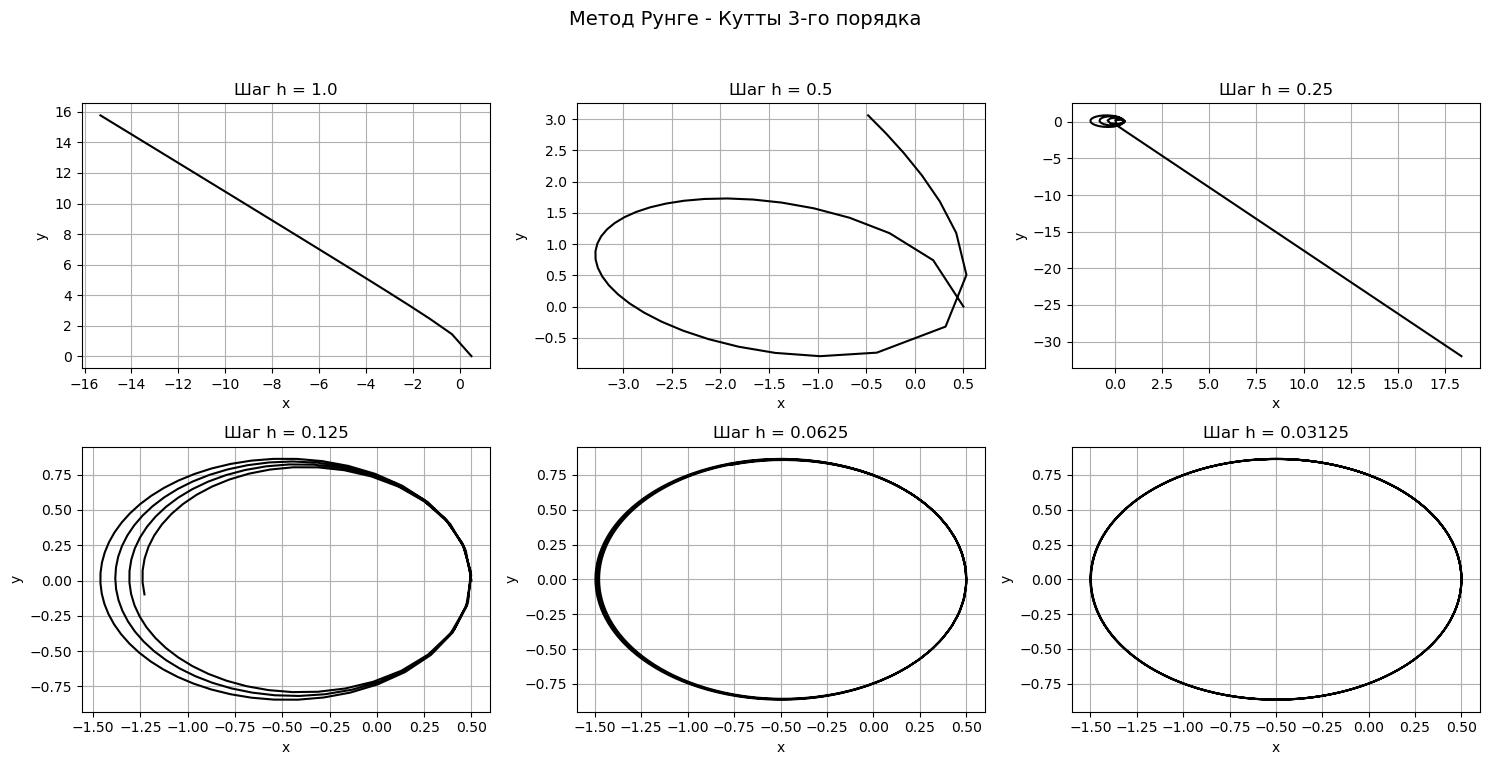

In [268]:
steps = [1/2**i for i in range(6)]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Метод Рунге - Кутты 3-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_runge_kutta(rk3_step, Y0, h, t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='black')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # чтобы не перекрыть заголовок
plt.show()

Тут не совсем понял, что за странное значение шага 0.25. По идее при уменьшении шага траектория должна всё больше становиться похожей на эллипс, но конкретно в методе 3го порядка при таком шаге траектория ухудшается, несмотря на уменьшение шага. Я ради эксперимента пробовал ставить значения шагов [1, 0.3, 0.09] и тд, то есть каждый раз уменьшать шаг в 3 раза, а не в 2, и тогда траектории ведут себя как обычно, т.к. шаг 0.25 перескакивается

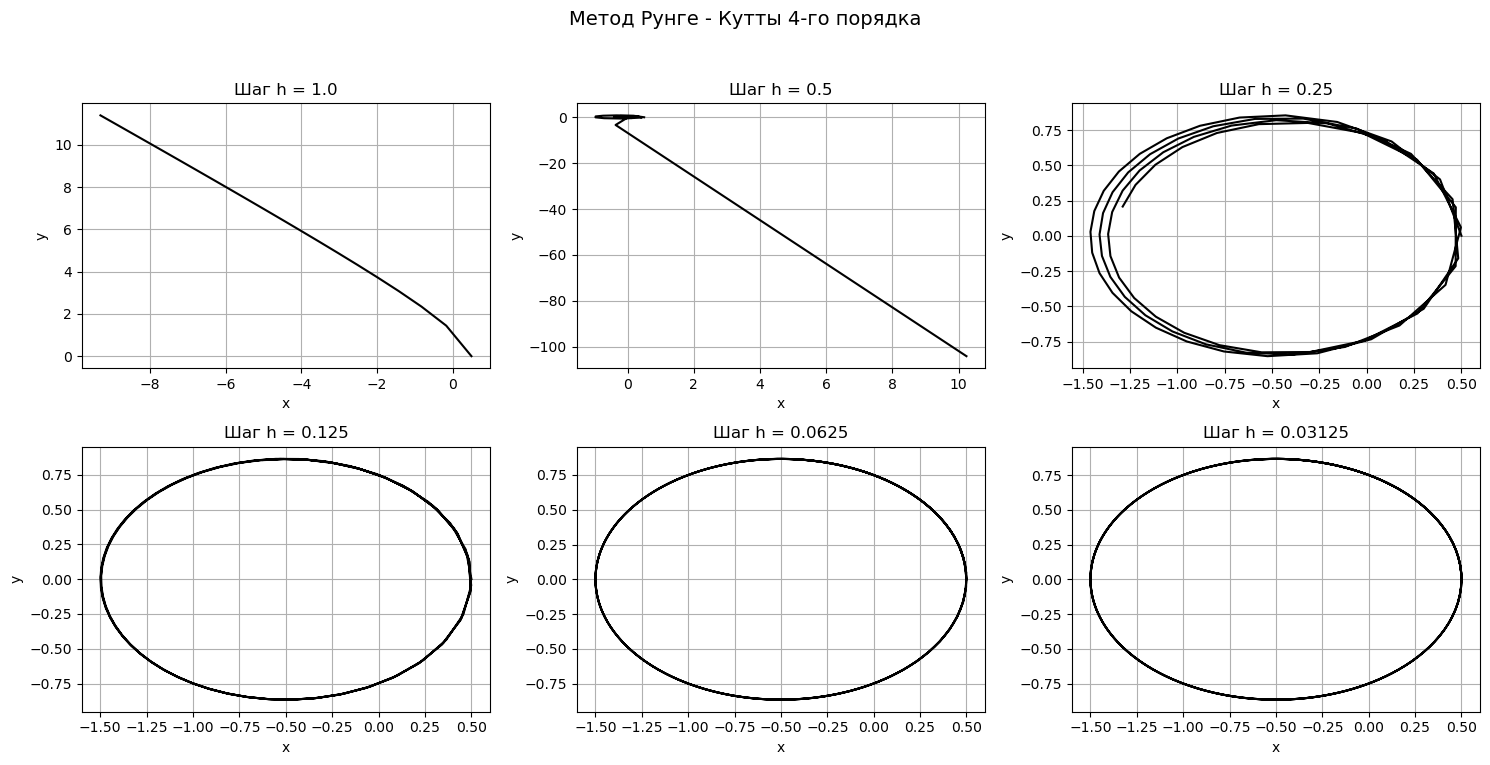

In [271]:
steps = [1/2**i for i in range(6)]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Метод Рунге - Кутты 4-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_runge_kutta(rk4_step, Y0, h, t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='black')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # чтобы не перекрыть заголовок
plt.show()

<h3 style="text-align:center;">Явные методы Адамса</h3>

Методы Рунге - Кутты являются *одношаговыми*, а теперь реализуем методы Адамса, которые являются *многошаговыми*

**Явные методы Адамса 1–4 порядка:**

<div align="left">

$$
\begin{aligned}
y_{n+1} &= y_n + \tau f_n, \\
y_{n+1} &= y_n + \tau \left( \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right), \\
y_{n+1} &= y_n + \tau \left( \frac{23}{12} f_n - \frac{16}{12} f_{n-1} + \frac{5}{12} f_{n-2} \right), \\
y_{n+1} &= y_n + \tau \left( \frac{55}{24} f_n - \frac{59}{24} f_{n-1} + \frac{37}{24} f_{n-2} - \frac{9}{24} f_{n-3} \right).
\end{aligned}
$$

</div>


In [273]:
# Метод Адамса 2-го порядка
def adams2_step(t, Y_hist, f_hist, h):
    return Y_hist[-1] + h * (3/2 * f_hist[-1] - 1/2 * f_hist[-2])

# Метод Адамса 3-го порядка
def adams3_step(t, Y_hist, f_hist, h):
    return Y_hist[-1] + h * (23/12 * f_hist[-1] - 16/12 * f_hist[-2] + 5/12 * f_hist[-3])

# Метод Адамса 4-го порядка
def adams4_step(t, Y_hist, f_hist, h):
    return Y_hist[-1] + h * (55/24 * f_hist[-1] - 59/24 * f_hist[-2] + 37/24 * f_hist[-3] - 9/24 * f_hist[-4])


In [300]:
def solve_adams(adams_step, order, Y0, h, t_end):
    t = 0
    ts = [t]
    Ys = [Y0.copy()]
    Y_hist = [Y0.copy()]
    f_hist = [f(t, Y0.copy())]

    # Используем метод Рунге - Кутты, чтобы найти первые несколько шагов для метода Адамса, ведь он многошаговый
    for _ in range(order - 1):
        Y_next = rk4_step(t, Y_hist[-1], h)
        t += h
        ts.append(t)
        Ys.append(Y_next.copy())
        Y_hist.append(Y_next.copy())
        f_hist.append(f(t, Y_next))

    while t < t_end:
        Y_new = adams_step(t, Y_hist, f_hist, h)
        t += h
        ts.append(t)
        Ys.append(Y_new.copy())

        Y_hist.append(Y_new.copy())
        f_hist.append(f(t, Y_new.copy()))
        if len(Y_hist) > order:
            Y_hist.pop(0)
            f_hist.pop(0)

    return np.array(ts), np.array(Ys)


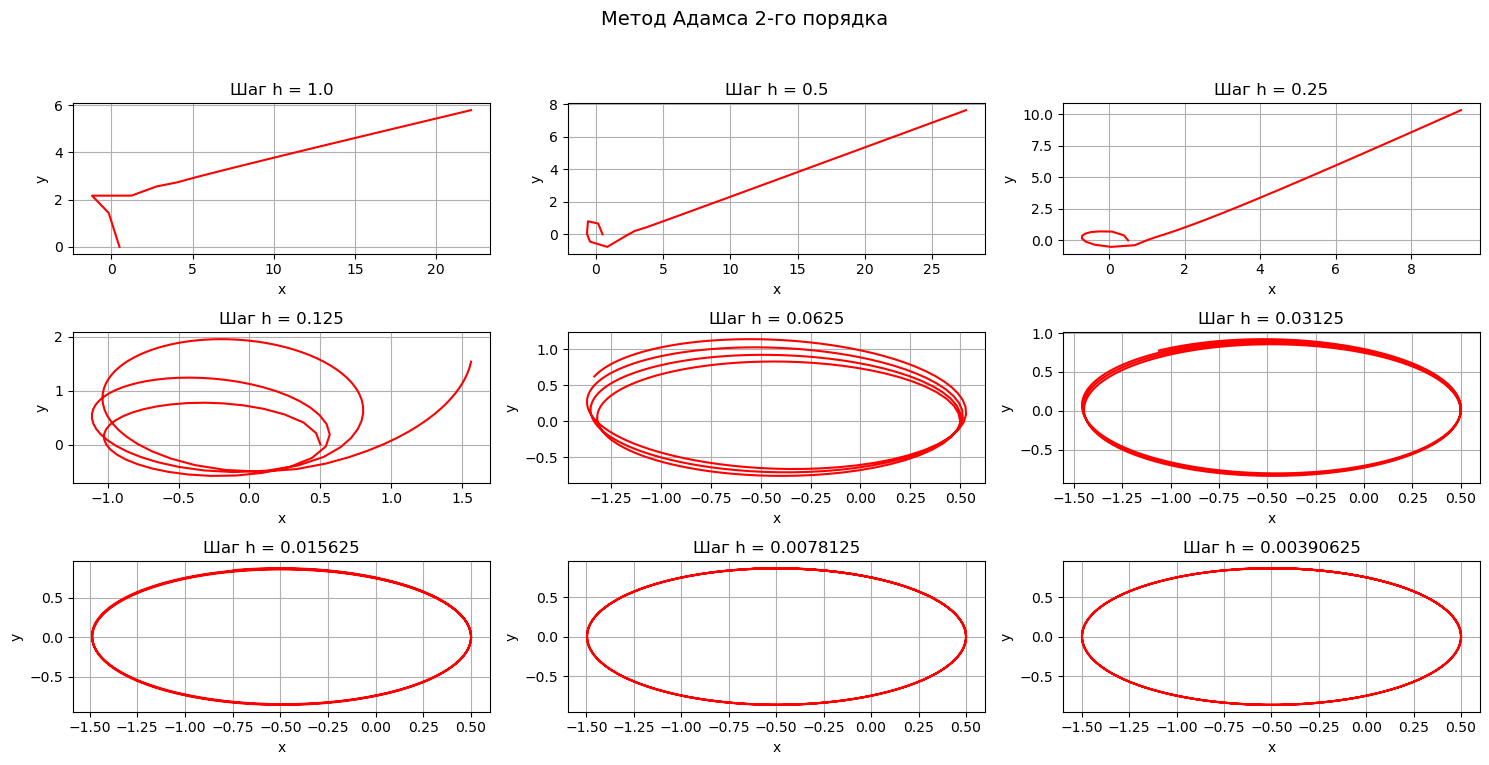

In [304]:
# Параметры
Y0 = np.array([0.5, 0, 0, np.sqrt(3)])
t_end = 20
steps = [1 / 2**i for i in range(9)]

# Построение графиков
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle("Метод Адамса 2-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_adams(adams2_step, order=2, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='red')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

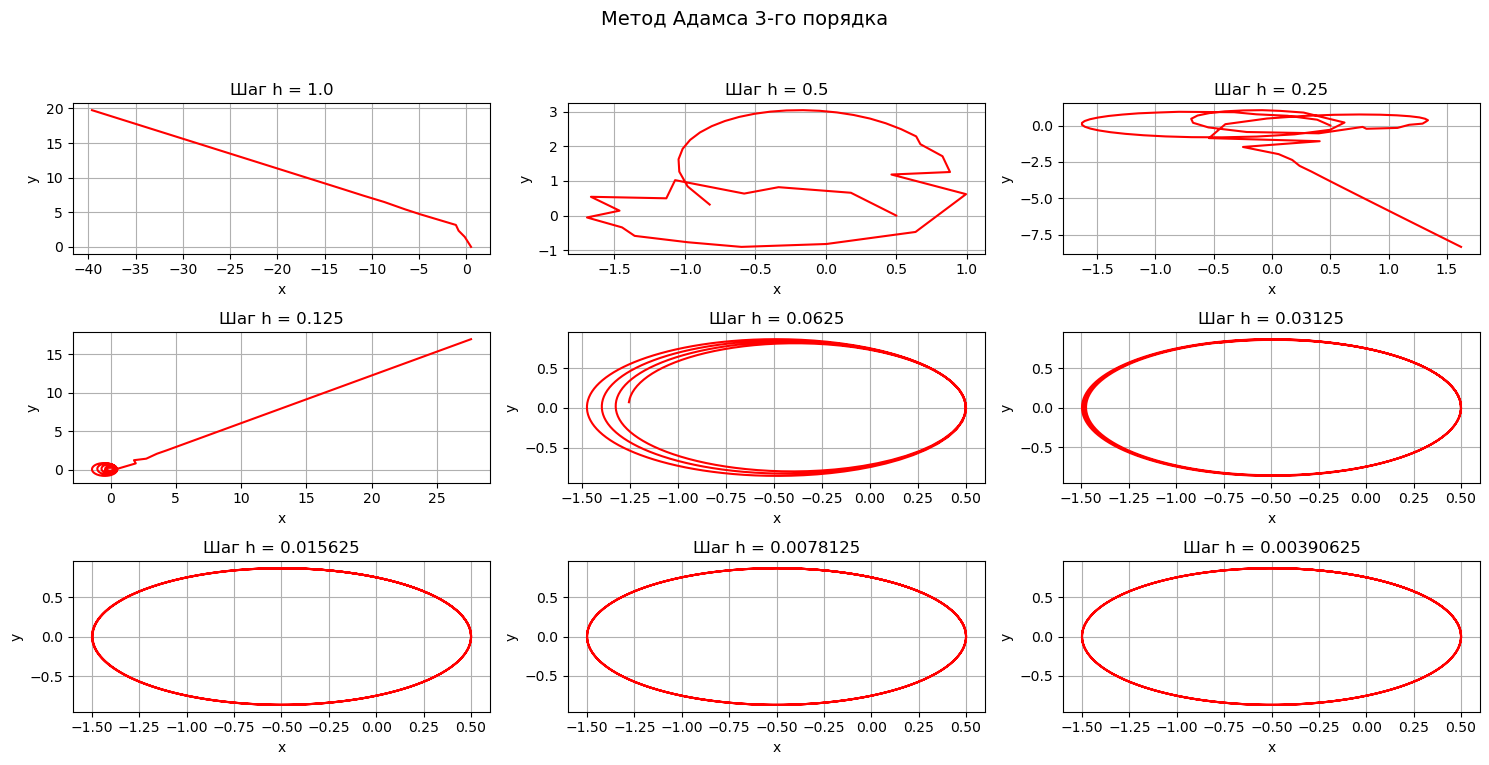

In [492]:
steps = [1 / 2**i for i in range(9)]

# Построение графиков
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle("Метод Адамса 3-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_adams(adams3_step, order=3, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='red')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

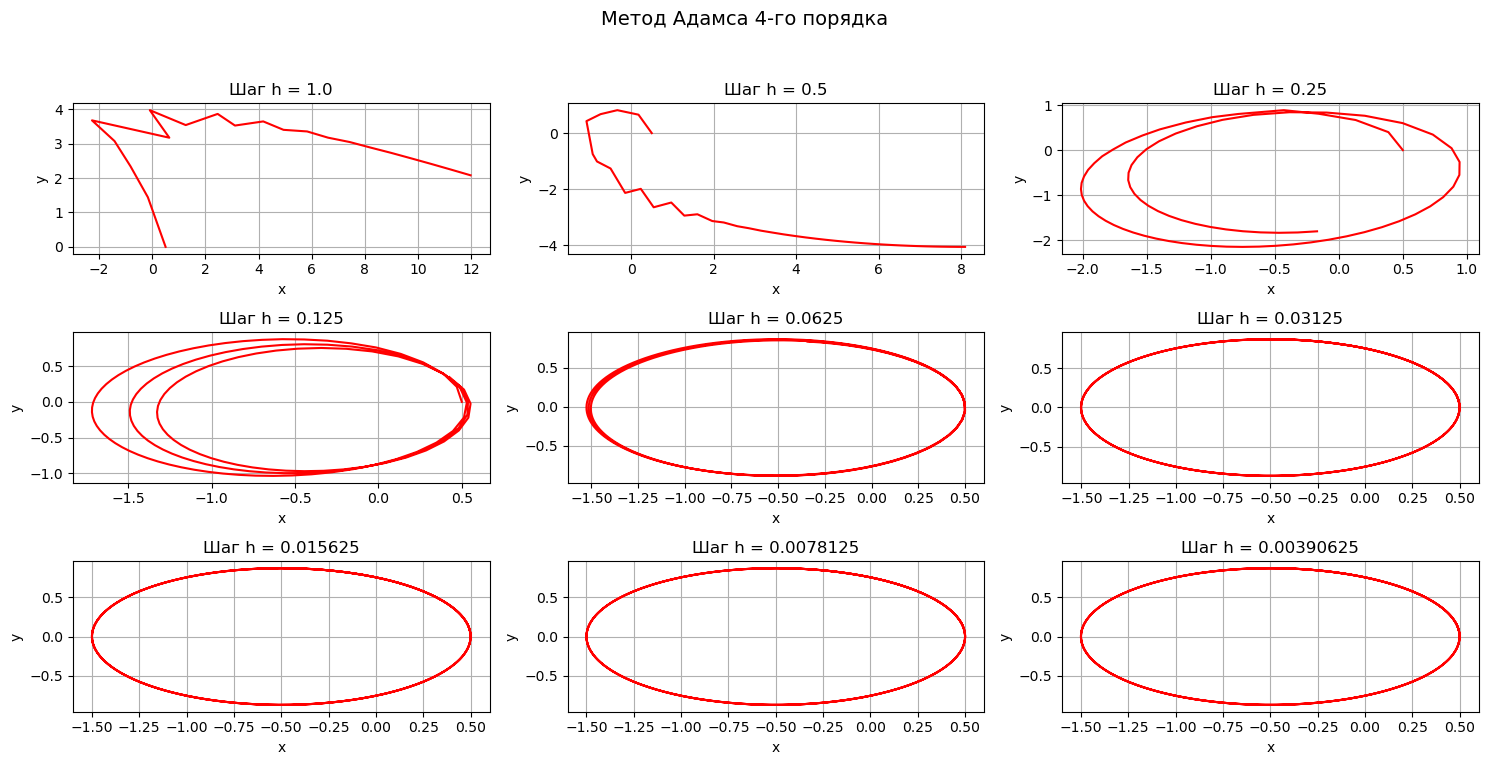

In [330]:
steps = [1 / 2**i for i in range(9)]

# Построение графиков
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle("Метод Адамса 4-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_adams(adams4_step, order=4, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='red')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h3 style="text-align:center;">Формулы Дифференцирования Назад</h3>

**Явные формулы ФДН при r = 1:**

<div align="left">

$$
\begin{aligned}
k = 1:& \quad y_{n+1} = y_n + h f_n, \\
k = 2:& \quad \frac{y_{n+1} - y_{n-1}}{2h} = f_n, \\
k = 3:& \quad \frac{1}{3} y_{n+1} + \frac{1}{2} y_n - y_{n-1} + \frac{1}{6} y_{n-2} = h f_n.
\end{aligned}
$$

</div>


In [498]:
def fdn1_step(t, Y_hist, f_hist, h):
    return Y_hist[-1] + h * f_hist[-1]

def fdn2_step(t, Y_hist, f_hist, h):
    return Y_hist[-2] + 2 * h * f_hist[-1]

def fdn3_step(t, Y_hist, f_hist, h):
    return 3 * (h * f_hist[-1] - 1/2 * Y_hist[-1] + Y_hist[-2] - 1/6 * Y_hist[-3])

# Универсальный решатель для явных ФДН
def solve_fdn(fdn_step, order, Y0, h, t_end):
    t = 0
    ts = [t]
    Ys = [Y0.copy()]
    Y_hist = [Y0.copy()]
    f_hist = [f(t, Y0.copy())]

    # Инициализация истории с помощью метода Рунге-Кутты
    for _ in range(order - 1):
        Y_next = rk4_step(t, Y_hist[-1], h)
        t += h
        ts.append(t)
        Ys.append(Y_next.copy())
        Y_hist.append(Y_next.copy())
        f_hist.append(f(t, Y_next))

    # Основной цикл
    while t < t_end:
        Y_new = fdn_step(t, Y_hist, f_hist, h)
        t += h
        ts.append(t)
        Ys.append(Y_new.copy())
        Y_hist.append(Y_new.copy())
        f_hist.append(f(t, Y_new.copy()))
        if len(Y_hist) > order:
            Y_hist.pop(0)
            f_hist.pop(0)

    return np.array(ts), np.array(Ys)

Тут я сделал так, чтобы шаг уменьшался быстрее, т.к. ФДН очень медленно сходится

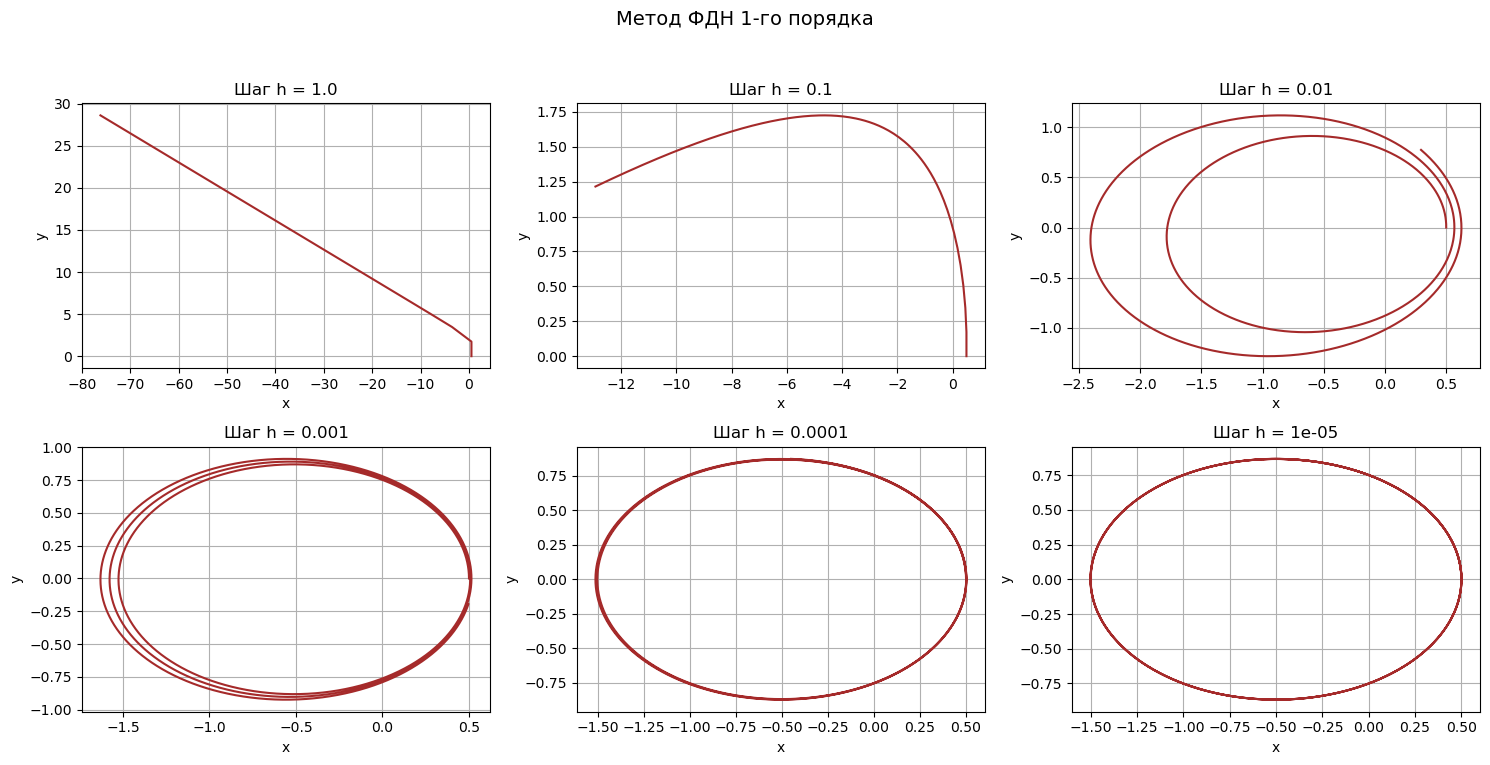

In [397]:
steps = [1 / 10**i for i in range(6)]

# Построение графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Метод ФДН 1-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_fdn(fdn1_step, order=1, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='brown')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

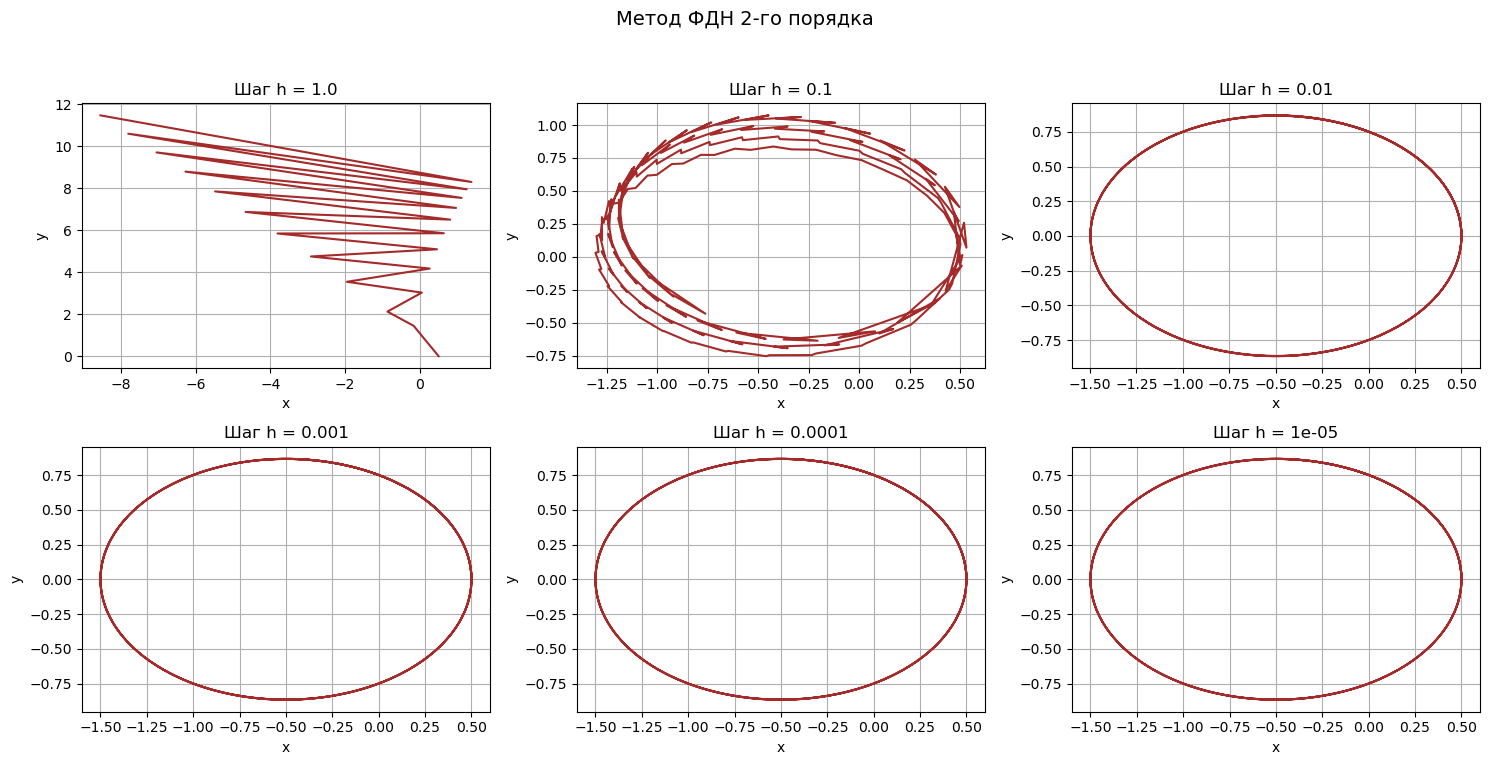

In [405]:
steps = [1 / 10**i for i in range(6)]

# Построение графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Метод ФДН 2-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_fdn(fdn2_step, order=2, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='brown')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\osale\AppData\Local\Temp\ipykernel_25304\1901750125.py:7: RuntimeWarning: overflow encountered in scalar power
  r3 = (x**2 + y**2)**1.5
C:\Users\osale\AppData\Local\Temp\ipykernel_25304\1901750125.py:7: RuntimeWarning: overflow encountered in scalar add
  r3 = (x**2 + y**2)**1.5


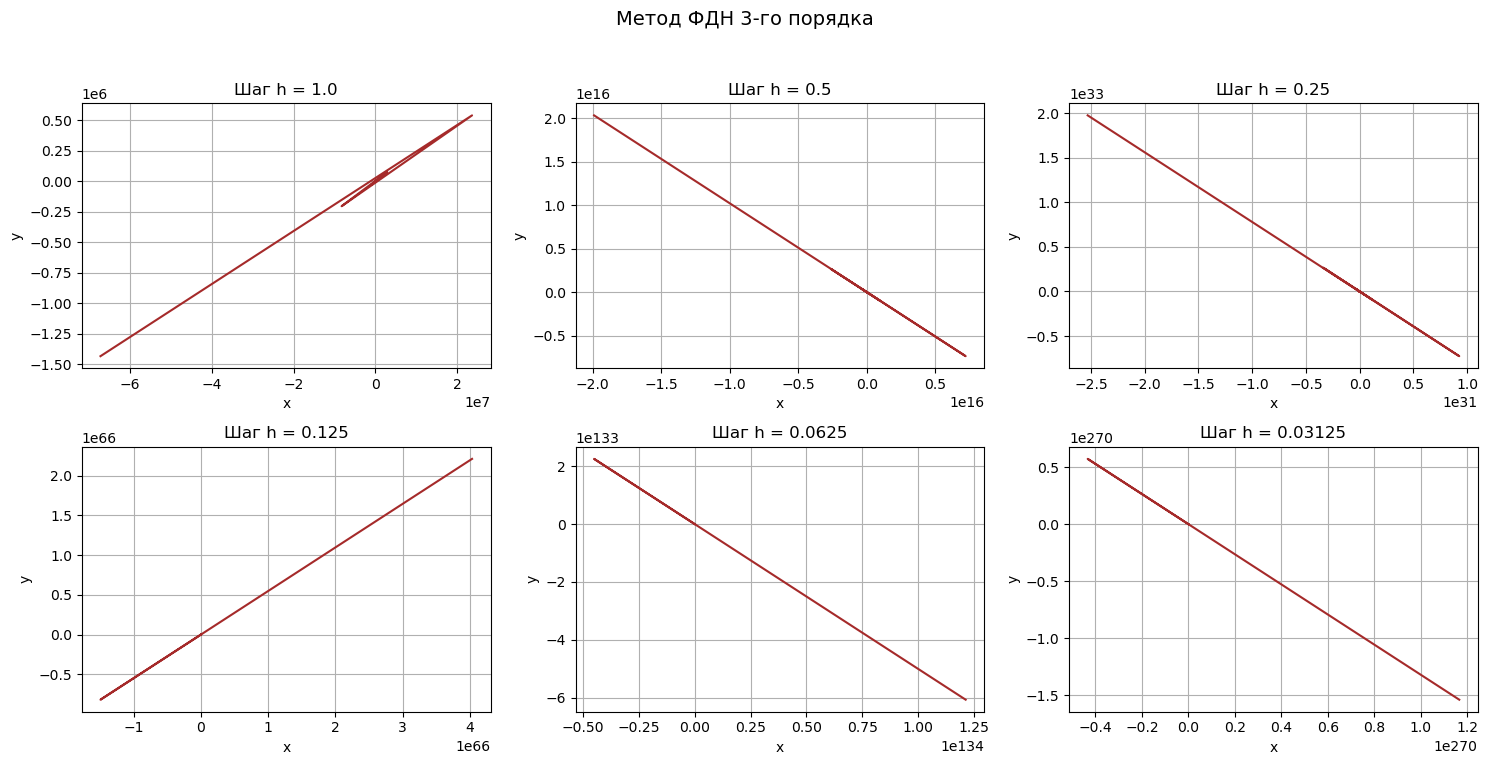

In [431]:
steps = [1 / 2**i for i in range(6)]

# Построение графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Метод ФДН 3-го порядка", fontsize=14)
for ax, h in zip(axes.flatten(), steps):
    ts, Ys = solve_fdn(fdn3_step, order=3, Y0=Y0, h=h, t_end=t_end)
    ax.plot(Ys[:, 0], Ys[:, 1], color='brown')
    ax.set_title(f"Шаг h = {h}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

По графикам видно, что метод ФДН 3-го порядка неустойчив

<h3 style="text-align:center;">Сравнение методов</h3>

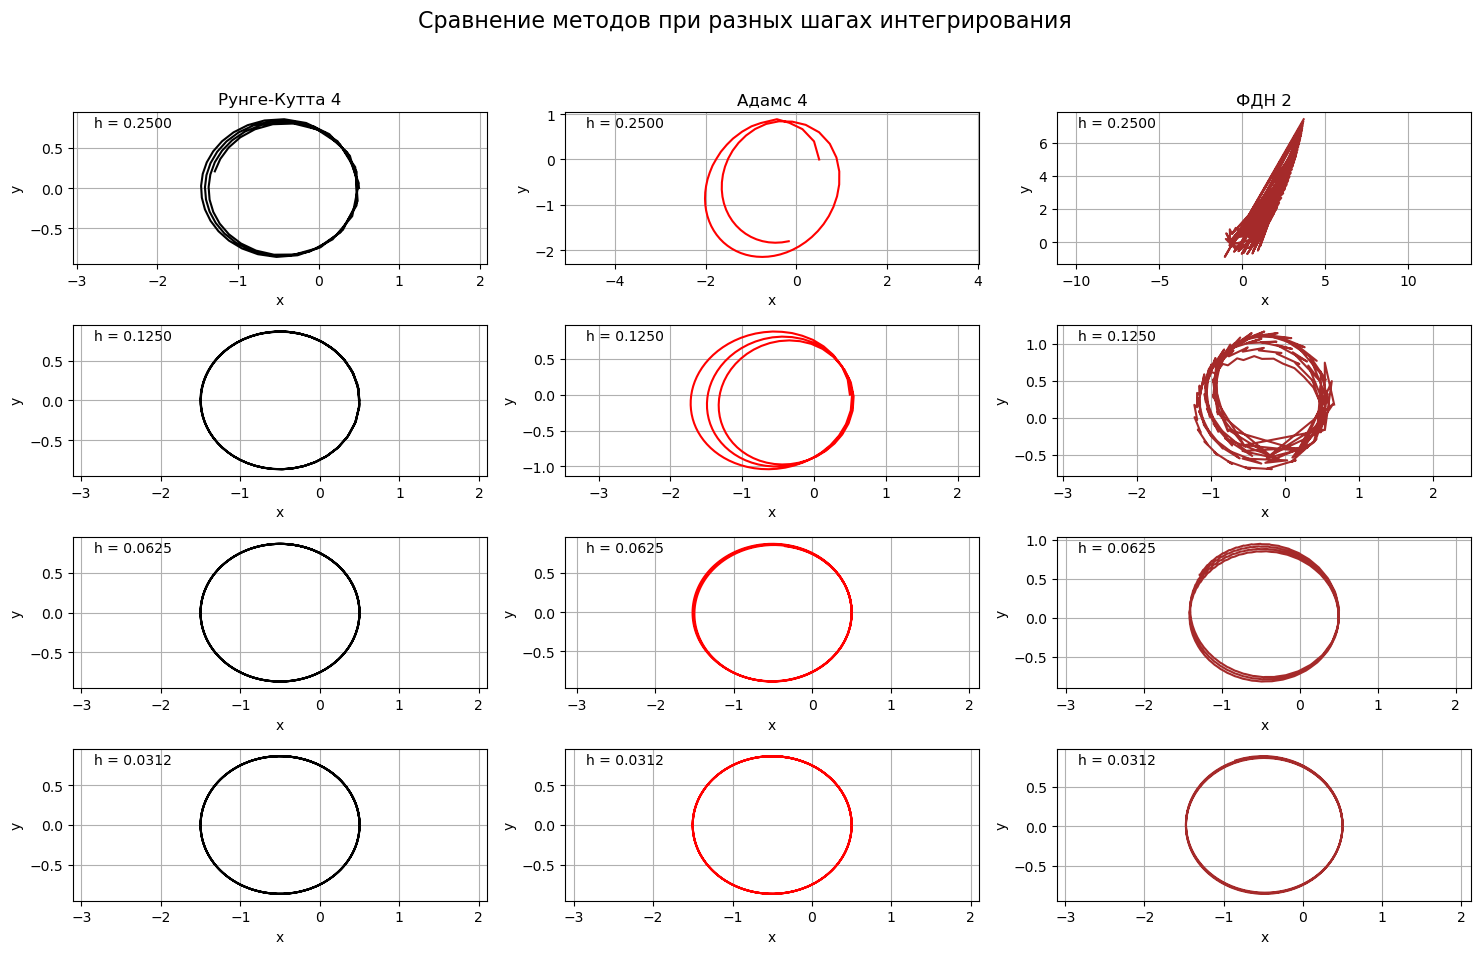

In [470]:
steps = [1 / 2**(i+2) for i in range(4)]
Y0 = np.array([0.5, 0, 0, np.sqrt(3)])
t_end = 20

method_labels = ["Рунге-Кутта 4", "Адамс 4", "ФДН 2"]
colors = ['black', 'red', 'brown']
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # 3 шага × 3 метода
for row, h in enumerate(steps):
    # РК4 — в первом столбце
    ts, Ys = solve(rk4_step, Y0, h, t_end)
    axes[row, 0].plot(Ys[:, 0], Ys[:, 1], color=colors[0])
    axes[row, 0].set_title(method_labels[0] if row == 0 else "")
    axes[row, 0].text(0.05, 0.9, f"h = {h:.4f}", transform=axes[row, 0].transAxes)
    
    # Адамс 4 — во втором столбце
    ts, Ys = solve_adams(adams4_step, order=4, Y0=Y0, h=h, t_end=t_end)
    axes[row, 1].plot(Ys[:, 0], Ys[:, 1], color=colors[1])
    axes[row, 1].set_title(method_labels[1] if row == 0 else "")
    axes[row, 1].text(0.05, 0.9, f"h = {h:.4f}", transform=axes[row, 1].transAxes)
    
    # ФДН 2 — в третьем столбце
    ts, Ys = solve_fdn(fdn2_step, order=2, Y0=Y0, h=h, t_end=t_end)
    axes[row, 2].plot(Ys[:, 0], Ys[:, 1], color=colors[2])
    axes[row, 2].set_title(method_labels[2] if row == 0 else "")
    axes[row, 2].text(0.05, 0.9, f"h = {h:.4f}", transform=axes[row, 2].transAxes)

# Оформление
for row in axes:
    for ax in row:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid()
        ax.axis("equal")

fig.suptitle("Сравнение методов при разных шагах интегрирования", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Из графиков видно, что Рунге - Кутта самый крутой! 😎